<a href="https://colab.research.google.com/github/Nandini37/Python_ML_AI/blob/branch1/FraudDetectionTransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import polars as pl
warnings.filterwarnings('ignore')

In [13]:
!pip install pyspark

In [14]:
df = pl.read_csv('/content/Fraud.csv')
print(df.shape)

(872856, 11)


In [15]:
df.head()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0


In [16]:

for col in df.columns:
  if df[col].dtype == pl.Utf8:

    print(f"Column name: {col}")
    print(f"Unique values for column '{col}':")
    print(df.select(pl.col(col).unique()).to_pandas())
    print("\n")

Column name: type
Unique values for column 'type':
       type
0     DEBIT
1   CASH_IN
2  CASH_OUT
3   PAYMENT
4  TRANSFER


Column name: nameOrig
Unique values for column 'nameOrig':
           nameOrig
0        C395192415
1       C2010999959
2        C879425127
3       C1934137185
4        C748359635
...             ...
872664   C205322721
872665  C2029672144
872666   C313829691
872667   C268047748
872668    C26024280

[872669 rows x 1 columns]


Column name: nameDest
Unique values for column 'nameDest':
           nameDest
0       M1982573452
1        M871907992
2        C155058250
3        M236355215
4       M2082180147
...             ...
370606  M2029735815
370607   M755306138
370608   M255054019
370609  M1081365669
370610   M976168115

[370611 rows x 1 columns]




In [17]:
df.describe()

statistic,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
str,f64,str,f64,str,f64,f64,str,f64,f64,f64,f64
"""count""",872856.0,"""872856""",872856.0,"""872856""",872856.0,872855.0,"""872855""",872855.0,872855.0,872855.0,872855.0
"""null_count""",0.0,"""0""",0.0,"""0""",0.0,1.0,"""1""",1.0,1.0,1.0,1.0
"""mean""",22.508587,null,163604.606958,null,878729.284548,899369.910682,null,985512.734532,1.1336e6,0.000561,0.0
"""std""",11.318998,null,264446.689504,null,2.9779e6,3.0147e6,null,2.3113e6,2.4414e6,0.023687,0.0
"""min""",1.0,"""CASH_IN""",0.1,"""C1000004530""",0.0,0.0,"""C1000015936""",0.0,0.0,0.0,0.0
"""25%""",13.0,null,13030.0,null,0.0,0.0,null,0.0,0.0,0.0,0.0
"""50%""",18.0,null,80781.47,null,16182.0,0.0,null,129974.03,229589.93,0.0,0.0
"""75%""",35.0,null,221061.93,null,145684.0,186846.41,null,921210.21,1.1776e6,0.0,0.0
"""max""",42.0,"""TRANSFER""",1e7,"""C999999254""",3.8939e7,3.8946e7,"""M999996397""",4.1483e7,4.2055e7,1.0,0.0


In [18]:
# Get columns with float and int data types
float_int_cols = [col for col, dtype in df.schema.items() if dtype in (pl.Float32, pl.Float64, pl.Int8, pl.Int16, pl.Int32, pl.Int64)]

# Calculate min and max for each selected column
for col in float_int_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    mean_value = df[col].mean()
    percentile75 = df[col].quantile(0.75)
    percentile25 = df[col].quantile(0.25)
    print(f"Column: {col}")
    print(f"Minimum value: {min_val}")
    print(f"Maximum value: {max_val}")
    print(f"Mean value: {mean_value}")
    print(f"75th percentile: {percentile75}")
    print(f"25th percentile: {percentile25}")
    print("\n")

Column: step
Minimum value: 1
Maximum value: 42
Mean value: 22.508586754287077
75th percentile: 35.0
25th percentile: 13.0


Column: amount
Minimum value: 0.1
Maximum value: 10000000.0
Mean value: 163604.60695764248
75th percentile: 221061.93
25th percentile: 13030.0


Column: oldbalanceOrg
Minimum value: 0.0
Maximum value: 38939424.03
Mean value: 878729.2845480011
75th percentile: 145684.0
25th percentile: 0.0


Column: newbalanceOrig
Minimum value: 0.0
Maximum value: 38946233.02
Mean value: 899369.9106819232
75th percentile: 186846.41
25th percentile: 0.0


Column: oldbalanceDest
Minimum value: 0.0
Maximum value: 41482697.12
Mean value: 985512.7345322762
75th percentile: 921210.21
25th percentile: 0.0


Column: newbalanceDest
Minimum value: 0.0
Maximum value: 42054659.73
Mean value: 1133609.6598843222
75th percentile: 1177562.54
25th percentile: 0.0


Column: isFraud
Minimum value: 0
Maximum value: 1
Mean value: 0.0005613761735912609
75th percentile: 0.0
25th percentile: 0.0


Column

In [19]:


q = (
    df.lazy()
    .group_by("isFraud")  # Group by 'isFraud'
    .agg(pl.count().alias("count"))  # Count occurrences
    .sort("count", descending=True)  # Sort by count in descending order
)

result_df = q.collect()  # Execute the query and get the result DataFrame
print(result_df)

shape: (3, 2)
┌─────────┬────────┐
│ isFraud ┆ count  │
│ ---     ┆ ---    │
│ i64     ┆ u32    │
╞═════════╪════════╡
│ 0       ┆ 872365 │
│ 1       ┆ 490    │
│ null    ┆ 1      │
└─────────┴────────┘


In [20]:


# Set the display options to show all columns and rows
#pl.Config.set_tbl_rows(None)  # Set to None to display all rows
pl.Config.set_tbl_cols(None)  # Set to None to display all columns

print(df)

shape: (872_856, 11)
┌──────┬──────────┬───────────┬─────────────┬───┬─────────────┬─────────────┬─────────┬────────────┐
│ step ┆ type     ┆ amount    ┆ nameOrig    ┆ … ┆ oldbalanceD ┆ newbalanceD ┆ isFraud ┆ isFlaggedF │
│ ---  ┆ ---      ┆ ---       ┆ ---         ┆   ┆ est         ┆ est         ┆ ---     ┆ raud       │
│ i64  ┆ str      ┆ f64       ┆ str         ┆   ┆ ---         ┆ ---         ┆ i64     ┆ ---        │
│      ┆          ┆           ┆             ┆   ┆ f64         ┆ f64         ┆         ┆ i64        │
╞══════╪══════════╪═══════════╪═════════════╪═══╪═════════════╪═════════════╪═════════╪════════════╡
│ 1    ┆ PAYMENT  ┆ 9839.64   ┆ C1231006815 ┆ … ┆ 0.0         ┆ 0.0         ┆ 0       ┆ 0          │
│ 1    ┆ PAYMENT  ┆ 1864.28   ┆ C1666544295 ┆ … ┆ 0.0         ┆ 0.0         ┆ 0       ┆ 0          │
│ 1    ┆ TRANSFER ┆ 181.0     ┆ C1305486145 ┆ … ┆ 0.0         ┆ 0.0         ┆ 1       ┆ 0          │
│ 1    ┆ CASH_OUT ┆ 181.0     ┆ C840083671  ┆ … ┆ 21182.0     ┆ 0.0   

In [21]:
# prompt: Handle missing values in pl df. I want to see all column output. the output is truc

# Assuming df is your Polars DataFrame
for col in df.columns:
  # Check for missing values in each column
  if df[col].null_count() > 0:
    print(f"Column '{col}' has missing values.")
    # Use drop_nulls to remove rows with missing values in the current column
    df = df.drop_nulls(subset=[col])
    print(f"Missing values in column '{col}' have been removed.")
  else:
    print(f"Column '{col}' has no missing values.")

Column 'step' has no missing values.
Column 'type' has no missing values.
Column 'amount' has no missing values.
Column 'nameOrig' has no missing values.
Column 'oldbalanceOrg' has no missing values.
Column 'newbalanceOrig' has missing values.
Missing values in column 'newbalanceOrig' have been removed.
Column 'nameDest' has no missing values.
Column 'oldbalanceDest' has no missing values.
Column 'newbalanceDest' has no missing values.
Column 'isFraud' has no missing values.
Column 'isFlaggedFraud' has no missing values.


In [22]:
#create a new col in df using polar lib for the calculation: oldbalanceOrg - newbalanceOrg and 'oldbalanceDest-newbalanceOrig.


df = df.with_columns(
    (pl.col("oldbalanceOrg") - pl.col("newbalanceOrig")).alias("balance_diff_orig"),
    (pl.col("oldbalanceDest") - pl.col("newbalanceDest")).alias("balance_diff_dest")
)

In [23]:
df.head()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff_orig,balance_diff_dest
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64,f64,f64
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0,9839.64,0.0
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0,1864.28,0.0
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0,181.0,0.0
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0,181.0,21182.0
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0,11668.14,0.0


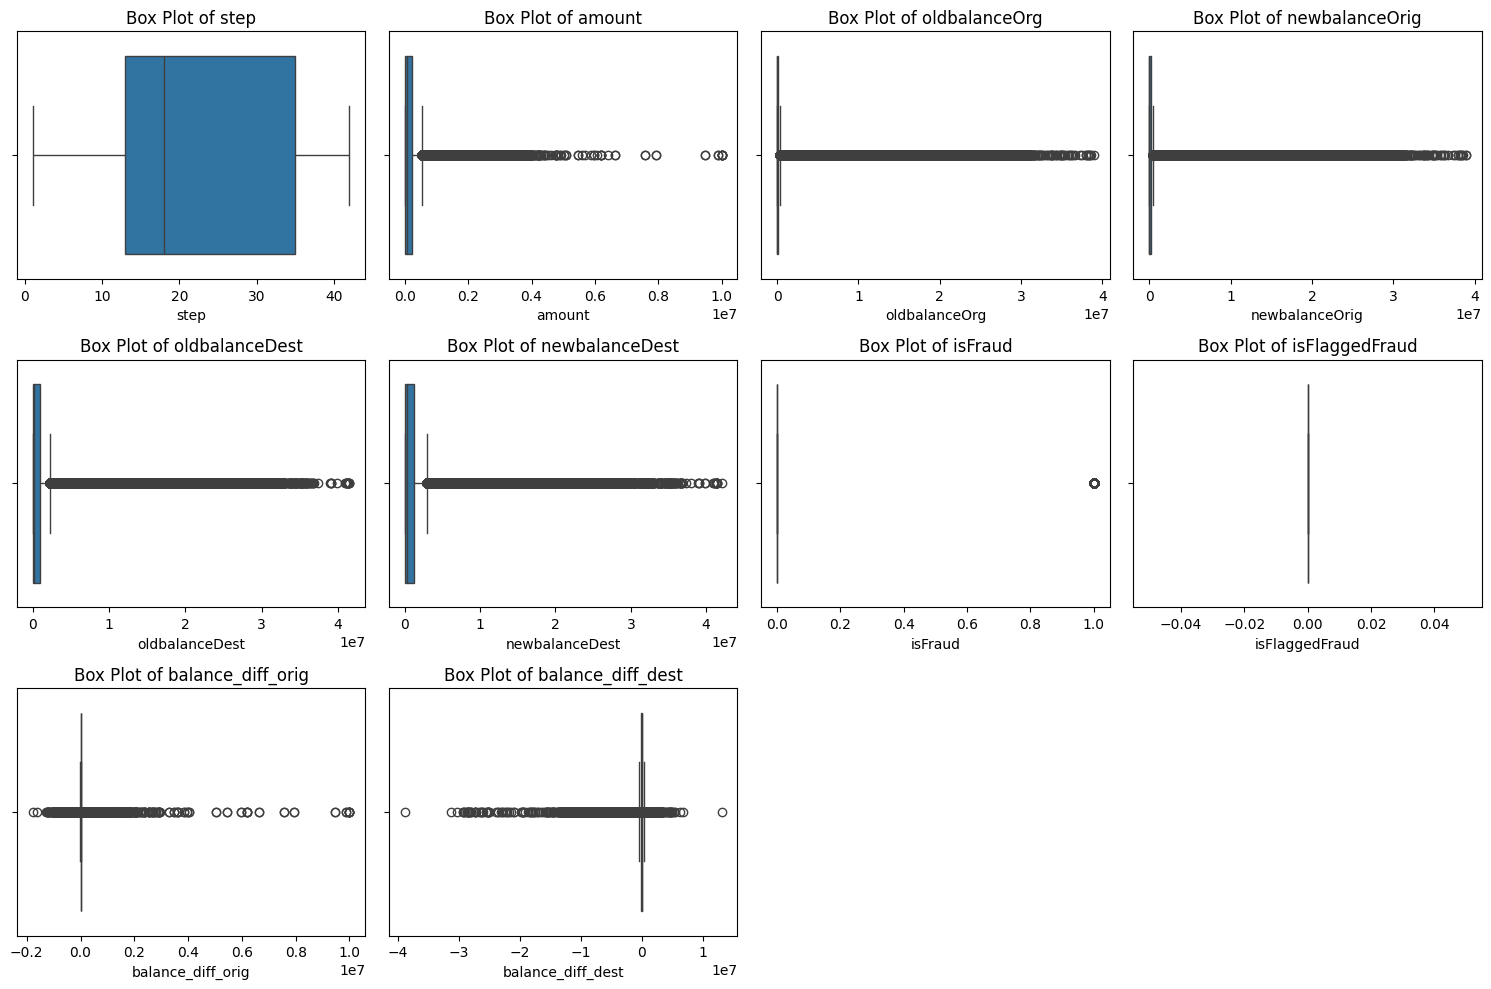

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

# Assuming df is your Polars DataFrame
numeric_cols = [col for col in df.columns if df[col].dtype in (pl.Float32, pl.Float64, pl.Int8, pl.Int16, pl.Int32, pl.Int64)]
num_plots = len(numeric_cols)

# Calculate the number of rows and columns for subplots
num_rows = int(num_plots**0.5)
num_cols = (num_plots + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array if necessary
if num_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]  # Wrap single Axes in a list

# Iterate through numeric columns and create box plots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col].to_pandas(), ax=axes[i])  # Assign plot to the correct subplot
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)  # Use col for x-axis label instead of 'isFraud'
    axes[i].set_ylabel('')  # Remove y-axis label since it's redundant for box plots

# Hide any unused subplots
for i in range(num_plots, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [25]:
print(df.columns)

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'balance_diff_orig', 'balance_diff_dest']


In [28]:


# Assuming df is your Polars DataFrame
cols_to_drop = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df = df.drop(cols_to_drop)
print(df.columns)

ColumnNotFoundError: "oldbalanceDest" not found

In [65]:

# Assuming `df` is your original DataFrame
# Step 1: Split the data into majority (isFraud = 0) and minority (isFraud = 1)
df_majority = df.filter(pl.col("isFraud") == 0)
df_minority = df.filter(pl.col("isFraud") == 1)

# Step 2: Undersample the majority class
n_minority = df_minority.shape[0]

# Randomly select a subset of the majority class
df_majority_undersampled = df_majority.sample(n=n_minority, with_replacement=False, seed=42)

# Step 3: Concatenate the undersampled majority and minority classes
df_balanced = pl.concat([df_majority_undersampled, df_minority])

# Step 4: Shuffle the rows to mix majority and minority examples
df_balanced = df_balanced.sample(n=df_balanced.shape[0], with_replacement=False, seed=42)



df_balanced = pd.DataFrame(df_balanced)
df_balanced.columns = df.columns
# Check if the column headers are still intact
print(df_balanced.columns)
print(df_balanced)


Index(['step', 'type', 'amount', 'nameOrig', 'nameDest', 'isFraud',
       'isFlaggedFraud', 'balance_diff_orig', 'balance_diff_dest'],
      dtype='object')
    step      type      amount     nameOrig     nameDest isFraud  \
0     11   PAYMENT      8224.1  C1759062772  M2108211751       0   
1     15  CASH_OUT   479760.59   C197908524  C2099617060       0   
2     14  TRANSFER   425971.09  C1153781287    C35084360       0   
3     35   PAYMENT    20999.92   C265162747  M1586188690       0   
4     19  CASH_OUT    16598.73  C1285727199   C895114532       0   
..   ...       ...         ...          ...          ...     ...   
975   42  CASH_OUT   334276.08  C1006070662  C1475265472       1   
976   42  TRANSFER  3569720.42  C1985844506   C440567141       1   
977   42  CASH_OUT  3569720.42  C2012983997   C365271329       1   
978   42  TRANSFER  1566057.28   C646867271   C701554593       1   
979   42  CASH_OUT  1566057.28  C1496808239   C737489499       1   

    isFlaggedFraud balanc

In [66]:
df_balanced.head()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,balance_diff_orig,balance_diff_dest
0,11,PAYMENT,8224.1,C1759062772,M2108211751,0,0,8224.1,0.0
1,15,CASH_OUT,479760.59,C197908524,C2099617060,0,0,17772.0,-789115.9
2,14,TRANSFER,425971.09,C1153781287,C35084360,0,0,256830.0,-748291.0
3,35,PAYMENT,20999.92,C265162747,M1586188690,0,0,12271.31,0.0
4,19,CASH_OUT,16598.73,C1285727199,C895114532,0,0,5066.0,10126.0


In [67]:
df_balanced.shape

(980, 9)

In [69]:
q = (
    df_balanced.lazy()
    .group_by("isFraud")  # Group by 'isFraud'
    .agg(pl.count().alias("count"))  # Count occurrences
    .sort("count", descending=True)  # Sort by count in descending order
)

result_df = q.collect()  # Execute the query and get the result DataFrame
print(result_df)

AttributeError: 'DataFrame' object has no attribute 'lazy'

In [68]:
from sklearn.preprocessing import LabelEncoder

df_balanced = pd.DataFrame(df_balanced)

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding on 'type' column
df_balanced['type_encoded'] = le.fit_transform(df_balanced['type'])

# Display the DataFrame
print(df_balanced.head())



  step      type     amount     nameOrig     nameDest isFraud isFlaggedFraud  \
0   11   PAYMENT     8224.1  C1759062772  M2108211751       0              0   
1   15  CASH_OUT  479760.59   C197908524  C2099617060       0              0   
2   14  TRANSFER  425971.09  C1153781287    C35084360       0              0   
3   35   PAYMENT   20999.92   C265162747  M1586188690       0              0   
4   19  CASH_OUT   16598.73  C1285727199   C895114532       0              0   

  balance_diff_orig balance_diff_dest  type_encoded  
0            8224.1               0.0             3  
1           17772.0         -789115.9             1  
2          256830.0         -748291.0             4  
3          12271.31               0.0             3  
4            5066.0           10126.0             1  


In [74]:
# prompt: perform train test split and apply logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



# Separate features (X) and target (y)
X = df_balanced.drop(columns=['isFraud', 'nameOrig', 'nameDest', 'type'])
y = df_pd['isFraud']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.8673469387755102
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        97
           1       0.96      0.77      0.85        99

    accuracy                           0.87       196
   macro avg       0.88      0.87      0.87       196
weighted avg       0.88      0.87      0.87       196



In [77]:
X_test.head()

,step,amount,isFlaggedFraud,balance_diff_orig,balance_diff_dest,type_encoded
788,26,331829.94,0,331829.94,-331829.95,1
440,15,15814.91,0,15814.91,0.0,3
139,11,194548.01,0,-194548.01,16843.0,0
695,18,295664.18,0,295664.18,-295664.18,1
66,16,42446.51,0,-42446.51,-782665.17,0


In [76]:
import joblib

# Saving the model using joblib
joblib.dump(model, 'FraudDetection_model.pkl')


['FraudDetection_model.pkl']